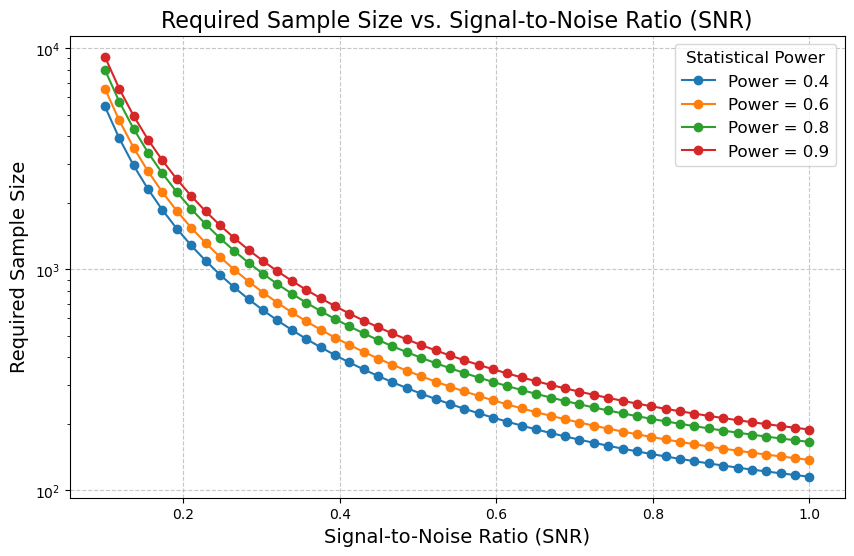

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Function to calculate required sample size for a given SNR and power
def calculate_sample_size(snr, power=0.8, alpha=5e-8):
    """
    Calculate the required sample size for a given SNR and power.
    
    Parameters:
    - snr: Signal-to-noise ratio (effect size / noise level).
    - power: Desired statistical power.
    - alpha: Significance level (default: 5e-8, standard for GWAS).
    
    Returns:
    - Required sample size.
    """
    # Effect size is proportional to SNR
    effect_size = snr / np.sqrt(1 + snr**2)
    
    # Initialize power analysis object
    power_analysis = TTestIndPower()
    
    # Calculate required sample size
    sample_size = power_analysis.solve_power(
        effect_size=effect_size,
        power=power,
        alpha=alpha,
        ratio=1.0  # Equal group sizes
    )
    
    return sample_size

# Input parameters
snr_values = np.linspace(0.1, 1.0, 50)  # Range of SNR values
powers = [0.4, 0.6, 0.8, 0.9]  # Different power levels to plot
alpha = 5e-8  # Significance level

# Plot the results
plt.figure(figsize=(10, 6))

# Loop through each power level and plot
for power in powers:
    sample_sizes = [calculate_sample_size(snr, power, alpha) for snr in snr_values]
    plt.plot(snr_values, sample_sizes, marker='o', linestyle='-', label=f'Power = {power}')

# Customize the plot
plt.title('Required Sample Size vs. Signal-to-Noise Ratio (SNR)', fontsize=16)
plt.xlabel('Signal-to-Noise Ratio (SNR)', fontsize=14)
plt.ylabel('Required Sample Size', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')  # Use log scale for better visualization
plt.legend(title='Statistical Power', fontsize=12, title_fontsize=12)
plt.show()